<a href="https://colab.research.google.com/github/palomacdev/previsao-churn-clientes-ml/blob/main/notebooks/churn_analysis_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Configurações para melhorar a visualização dos gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# --- Carregamento e Limpeza Inicial dos Dados ---

# Carregar o dataset
# O caminho aponta diretamente para o arquivo online, facilitando o acesso.
file_path = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset carregado com sucesso!")
except Exception as e:
    print(f"Erro ao carregar o dataset: {e}")
    exit()


Dataset carregado com sucesso!


In [ ]:
# Inspeção inicial
print("\n--- Amostra dos Dados ---")
print(df.head())

print("\n--- Informações do DataFrame ---")
df.info()


--- Amostra dos Dados ---
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streaming

In [ ]:
# --- Limpeza de Dados Específica ---
# A coluna 'TotalCharges' é lida como texto (object) porque tem espaços vazios.
# Converter para número, forçando os erros a se tornarem Nulos (NaN).
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [ ]:
# Existem 11 linhas com TotalCharges Nulos (clientes novos, com tenure=0).
# Como são muito poucos, a forma mais simples é removê-los do dataset.
df.dropna(subset=['TotalCharges'], inplace=True)

In [ ]:
# A coluna Churn é 'Yes'/'No'. Vamos criar uma coluna numérica (1/0) para facilitar os cálculos.
df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


--- Iniciando Análise Exploratória ---

Taxa média de churn por serviço de Streaming TV:
StreamingTV
No                     0.335
No internet service    0.074
Yes                    0.301
Name: Churn_numeric, dtype: float64



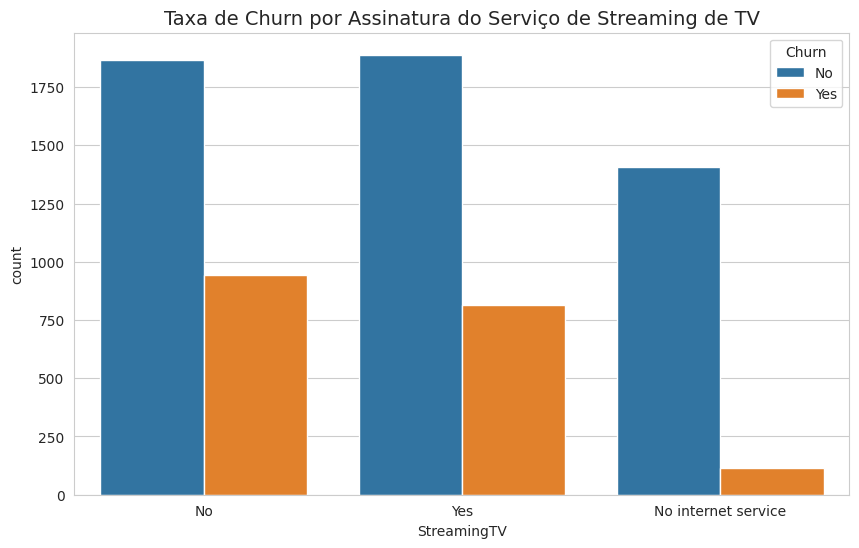

In [ ]:
# --- Análise Exploratória Focada ---

print("\n--- Iniciando Análise Exploratória ---")

# 1. Análise: Churn vs. Assinatura de Streaming de TV
plt.figure() # Cria uma nova figura para o gráfico
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.title('Taxa de Churn por Assinatura do Serviço de Streaming de TV', fontsize=14)
churn_rate_tv = df.groupby('StreamingTV')['Churn_numeric'].mean().round(3)
print(f"\nTaxa média de churn por serviço de Streaming TV:\n{churn_rate_tv}\n")

Taxa média de churn por serviço de Streaming de Filmes:
StreamingMovies
No                     0.337
No internet service    0.074
Yes                    0.300
Name: Churn_numeric, dtype: float64



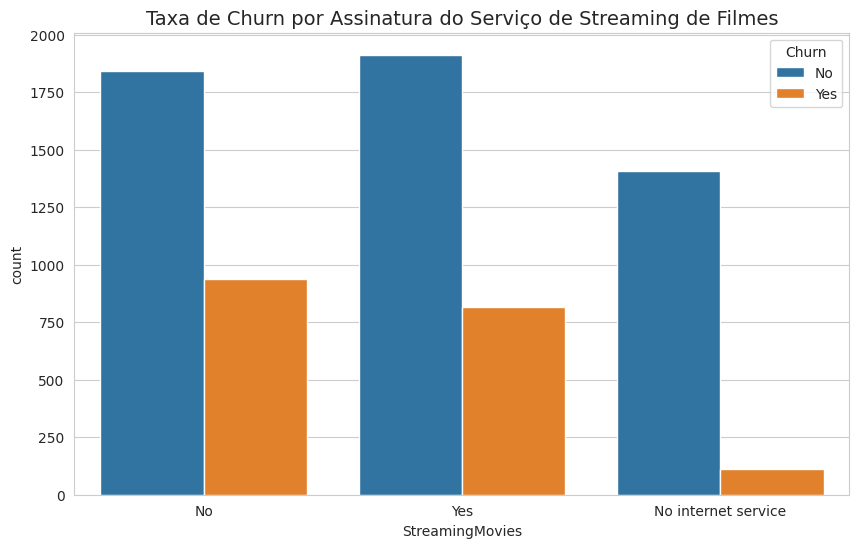

In [ ]:
# 2. Análise: Churn vs. Assinatura de Streaming de Filmes
plt.figure()
sns.countplot(x='StreamingMovies', hue='Churn', data=df)
plt.title('Taxa de Churn por Assinatura do Serviço de Streaming de Filmes', fontsize=14)
churn_rate_movies = df.groupby('StreamingMovies')['Churn_numeric'].mean().round(3)
print(f"Taxa média de churn por serviço de Streaming de Filmes:\n{churn_rate_movies}\n")

Taxa média de churn por status de streaming:
StreamingStatus
Ambos os Serviços    0.294
Apenas um Serviço    0.315
Nenhum Serviço       0.228
Name: Churn_numeric, dtype: float64



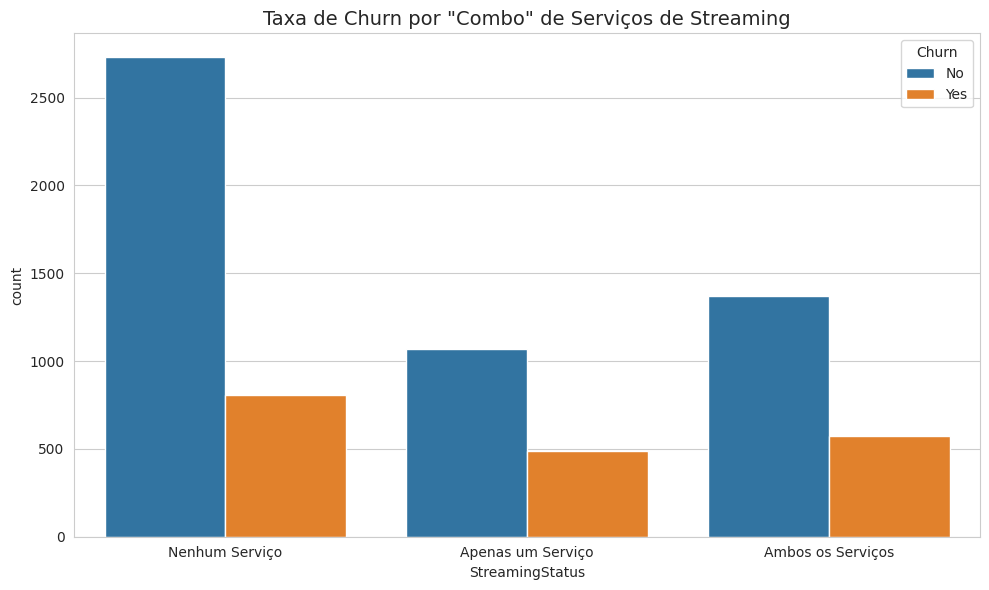

In [ ]:
# 3. Análise: Clientes com "Combo Streaming" (ambos os serviços)
# Criar uma categoria para quem tem ambos, um ou nenhum serviço de streaming
def get_streaming_status(row):
    if row['StreamingTV'] == 'Yes' and row['StreamingMovies'] == 'Yes':
        return 'Ambos os Serviços'
    elif row['StreamingTV'] == 'Yes' or row['StreamingMovies'] == 'Yes':
        return 'Apenas um Serviço'
    else:
        return 'Nenhum Serviço'

df['StreamingStatus'] = df.apply(get_streaming_status, axis=1)

plt.figure()
sns.countplot(x='StreamingStatus', hue='Churn', data=df, order=['Nenhum Serviço', 'Apenas um Serviço', 'Ambos os Serviços'])
plt.title('Taxa de Churn por "Combo" de Serviços de Streaming', fontsize=14)
churn_rate_combo = df.groupby('StreamingStatus')['Churn_numeric'].mean().round(3)
print(f"Taxa média de churn por status de streaming:\n{churn_rate_combo}\n")

# Exibe todos os gráficos gerados
plt.tight_layout()
plt.show()



--- Gerando Análise de Preço vs. Churn ---


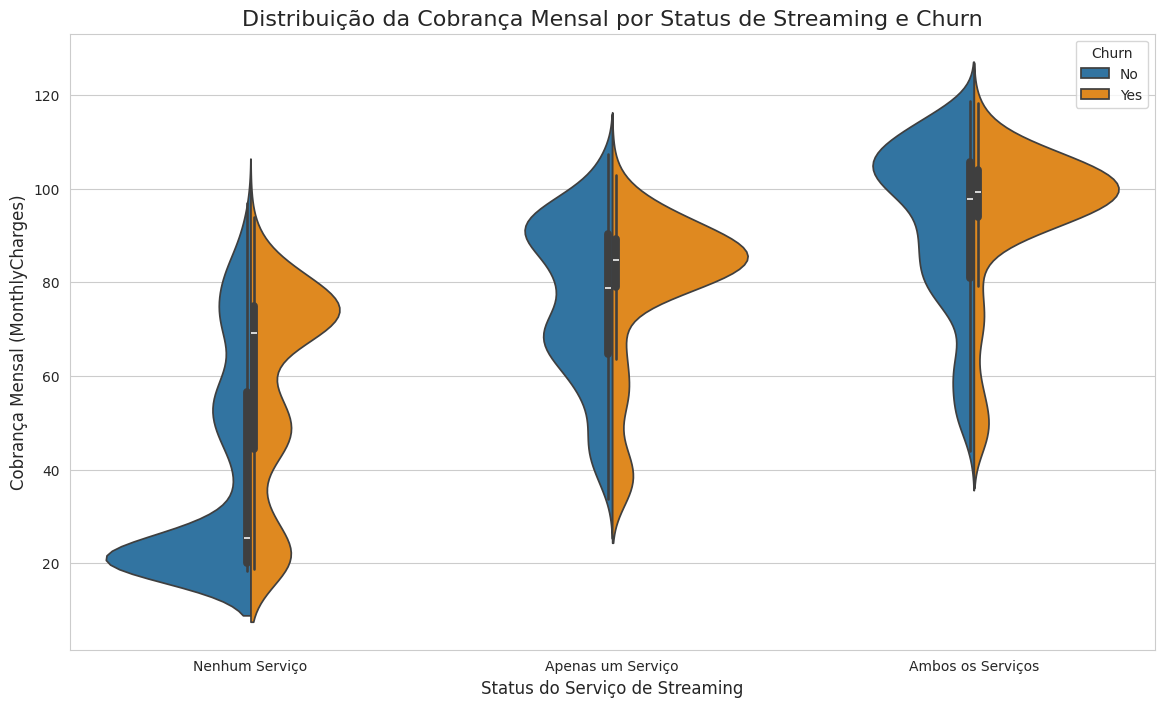

In [ ]:
# --- Análise 2: Relação entre Preço Mensal e Churn por Status de Streaming ---

print("\n--- Gerando Análise de Preço vs. Churn ---")

plt.figure(figsize=(14, 8)) # Ajustar o tamanho para melhor visualização
sns.violinplot(
    data=df,
    x='StreamingStatus',
    y='MonthlyCharges',
    hue='Churn',
    split=True, # Divide o violino ao meio para comparar Churn='Yes' vs 'No'
    palette={'Yes': '#FF8C00', 'No': '#1f77b4'}, # Cores Laranja/Azul
    order=['Nenhum Serviço', 'Apenas um Serviço', 'Ambos os Serviços']
)

plt.title('Distribuição da Cobrança Mensal por Status de Streaming e Churn', fontsize=16)
plt.xlabel('Status do Serviço de Streaming', fontsize=12)
plt.ylabel('Cobrança Mensal (MonthlyCharges)', fontsize=12)
plt.legend(title='Churn')
plt.show()

In [ ]:
## Machine Learning

#importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# --- Preparação dos Dados para Machine Learning ---

print("\n\n--- Iniciando Preparação dos Dados para ML ---")

# 1. Limpeza final e seleção de features
# A coluna 'customerID' é apenas um identificador, não serve para o modelo.
# A coluna 'StreamingStatus' criada foi útil para EDA, mas agora vou usar as originais.
# A coluna 'Churn_numeric' foi útil para os cálculos, mas o alvo final será a coluna 'Churn' original.
df_model = df.drop(columns=['customerID', 'StreamingStatus', 'Churn_numeric'])





--- Iniciando Preparação dos Dados para ML ---


In [ ]:
# 2. Converter a coluna alvo 'Churn' de 'Yes'/'No' para 1/0
df_model['Churn'] = df_model['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# 3. Converter todas as outras variáveis categóricas em numéricas (One-Hot Encoding)
# O get_dummies vai transformar colunas de texto em várias colunas de 0s e 1s.
df_processed = pd.get_dummies(df_model, drop_first=True)

print(f"O DataFrame foi transformado e agora tem {df_processed.shape[1]} colunas.")

O DataFrame foi transformado e agora tem 31 colunas.


In [ ]:
# 4. Separar Features (X) e Alvo (y)
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

In [ ]:
# 5. Dividir os dados em Conjunto de Treino e Conjunto de Teste (80/20)
# Usar 'stratify=y' para garantir que a proporção de churn seja a mesma nos dois conjuntos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Dados divididos em conjuntos de treino e teste.")

Dados divididos em conjuntos de treino e teste.


In [ ]:
# --- Treinamento e Avaliação do Modelo Baseline: Regressão Logística ---

print("\n--- Treinando Modelo Baseline: Regressão Logística ---")
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)


--- Treinando Modelo Baseline: Regressão Logística ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("\nRelatório de Classificação (Regressão Logística):")
# Vou dar nomes às classes para o relatório ficar mais claro
print(classification_report(y_test, y_pred_log, target_names=['Ficou (0)', 'Cancelou (1)']))


Relatório de Classificação (Regressão Logística):
              precision    recall  f1-score   support

   Ficou (0)       0.85      0.89      0.87      1033
Cancelou (1)       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [ ]:
# --- Treinamento e Avaliação do Modelo Avançado: Random Forest ---

print("\n--- Treinando Modelo Avançado: Random Forest ---")
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRelatório de Classificação (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=['Ficou (0)', 'Cancelou (1)']))


--- Treinando Modelo Avançado: Random Forest ---

Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

   Ficou (0)       0.84      0.89      0.86      1033
Cancelou (1)       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
# --- Etapa Final: Interpretando o Modelo Vencedor (Regressão Logística) ---

print("\n\n--- Interpretando o Modelo: Fatores de Churn e Retenção ---")




--- Interpretando o Modelo: Fatores de Churn e Retenção ---


In [ ]:
# 1. Extrair os coeficientes do modelo treinado
coefficients = log_model.coef_[0]
feature_names = X_train.columns

In [ ]:
# 2. Criar um DataFrame para facilitar a visualização
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [ ]:
# 3. Ordenar o DataFrame pelos coeficientes
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

/tmp/ipython-input-3455183854.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


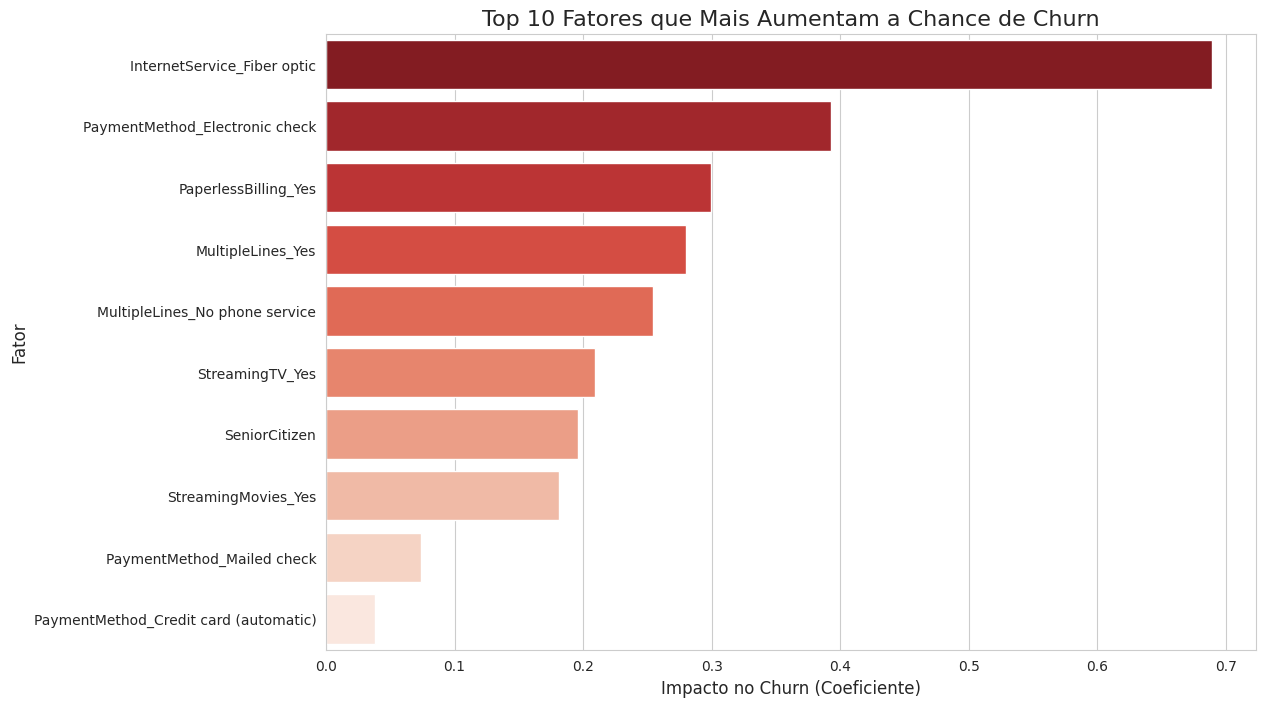

In [ ]:
# 4. Visualizar os 10 principais fatores que AUMENTAM o churn (coeficientes positivos)
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coefficients_df.head(10),
    palette='Reds_r'
)
plt.title('Top 10 Fatores que Mais Aumentam a Chance de Churn', fontsize=16)
plt.xlabel('Impacto no Churn (Coeficiente)', fontsize=12)
plt.ylabel('Fator', fontsize=12)
plt.show()

/tmp/ipython-input-4160800119.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


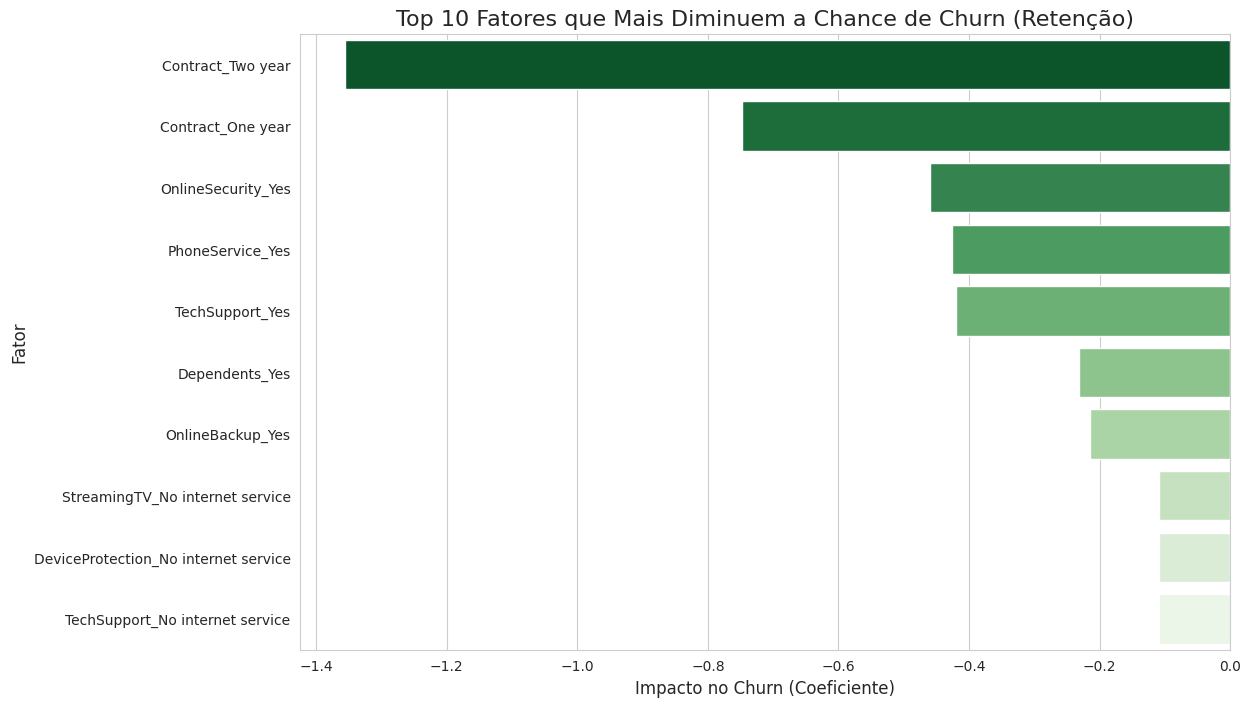

In [ ]:
# 5. Visualizar os 10 principais fatores que DIMINUEM o churn (coeficientes negativos)
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coefficients_df.tail(10).sort_values(by='Coefficient', ascending=True),
    palette='Greens_r'
)
plt.title('Top 10 Fatores que Mais Diminuem a Chance de Churn (Retenção)', fontsize=16)
plt.xlabel('Impacto no Churn (Coeficiente)', fontsize=12)
plt.ylabel('Fator', fontsize=12)
plt.show()